# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion

### Integrates de Grupo:
* Walter Marañón
* Patricia Mollericona (pattypa50@hotmail.es)
* Jorge Vallejos (GeorgeVallejosEscobar@gmail.com)


## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

In [1]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys


# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson


# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = 'dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

# Entendimiento de los Datos

In [3]:
# Listar contenido del dataset
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Revisar el tipo de variables (Features) en el Dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(raw_data.describe())

           Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34 

# Manipulacion y Limpieza de Datos

In [6]:
print(raw_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# Calcular la cantidad de valores nulos por columna
contar_nulos = raw_data.isnull().sum()

# Filtrar las columnas con valores nulos
contar_nulos = contar_nulos[contar_nulos > 0]

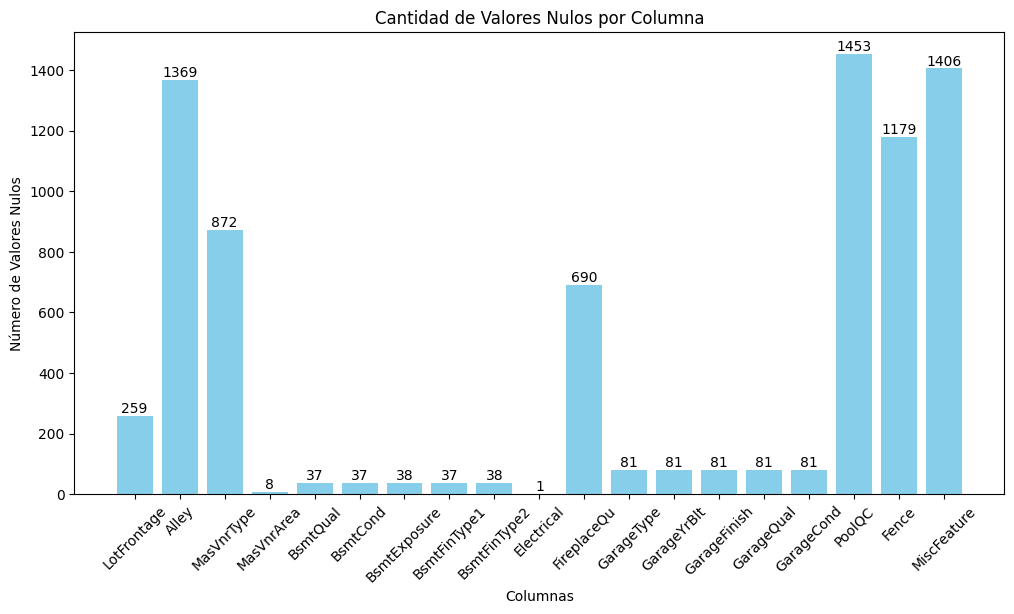

In [8]:
# Crear un gráfico de barras para ver la cantidad de Nulos
plt.figure(figsize=(12, 6))
bars = plt.bar(contar_nulos.index, contar_nulos, color='skyblue')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Nulos')
plt.xticks(rotation=45)


# Agregar etiquetas con el total de nulos en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom')  # Ajustar la posición de la etiqueta

#plt.grid()
plt.show()

In [9]:
# Listar el % de nulos por columna
round(raw_data.isnull().sum()/len(raw_data)*100,2).sort_values(ascending=False).head(15)

,0
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


### Dropping Data


In [10]:
# Eliminar columnas con mayor cantidad de datos nulos (>40%)
# Y la columna ID
new_data = raw_data.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

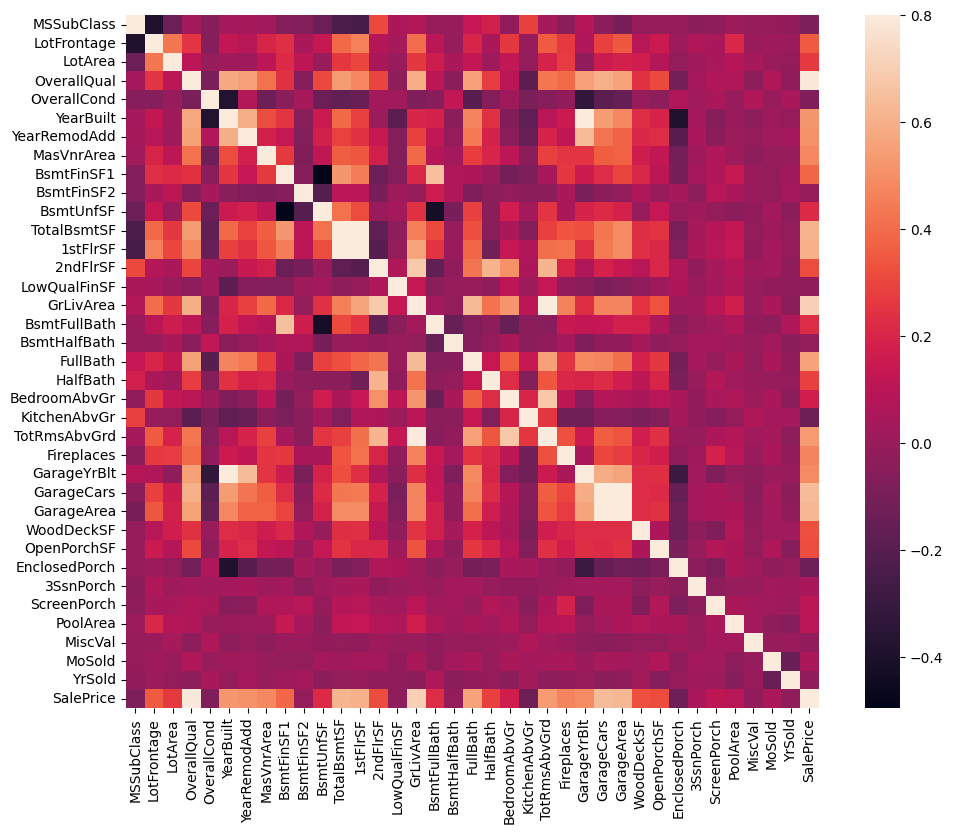

In [11]:
# Revisamos las correlaciones de todas las variables
# Correlation Matrix
corrmat = new_data[[f for f in new_data.columns if new_data.dtypes[f] != 'object']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Derived Data

In [12]:
# las siguiente variables son categoricas numericas, por lo que las convertimos a string
new_data['MSSubClass'] = new_data['MSSubClass'].apply(str)
new_data['YrSold'] = new_data['YrSold'].astype(str)
new_data['MoSold'] = new_data['MoSold'].astype(str)

# estas variables son completadas con el valor mas tradicional segun la descripcion del dataset
new_data['Functional'] = new_data['Functional'].fillna('Typ')
new_data['Electrical'] = new_data['Electrical'].fillna("SBrkr")
new_data['KitchenQual'] = new_data['KitchenQual'].fillna("TA")

# completamos las variables con el valor mas comun
new_data['Exterior1st'] = new_data['Exterior1st'].fillna(new_data['Exterior1st'].mode()[0])
new_data['Exterior2nd'] = new_data['Exterior2nd'].fillna(new_data['Exterior2nd'].mode()[0])
new_data['SaleType'] = new_data['SaleType'].fillna(new_data['SaleType'].mode()[0])

new_data['MasVnrArea'] = new_data['MasVnrArea'].fillna(new_data['MasVnrArea'].mean())

# completamos las variables con el valor 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    new_data[col] = new_data[col].fillna(0)

# completamos las variables con el valor None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    new_data[col] = new_data[col].fillna('None')

# completamos las variables con el valor None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    new_data[col] = new_data[col].fillna('None')

# Despues de probar en el modelo de datos, es convenienete agrupar estas variables y
# completarlas con la moda y meadiana
new_data['MSZoning'] = new_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
new_data['LotFrontage'] = new_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [13]:
# Esta columnas se eliminad porque la clase mayoritaria dominante
# hace de las variable poco util
new_data = new_data.drop(['Utilities', 'Street'], axis=1)

# se crean nuevas variables
new_data['YrBltAndRemod']=new_data['YearBuilt'] + new_data['YearRemodAdd']
new_data['TotalSF']=new_data['TotalBsmtSF'] + new_data['1stFlrSF'] + new_data['2ndFlrSF']

new_data['Total_sqr_footage'] = (new_data['BsmtFinSF1'] + new_data['BsmtFinSF2'] +
                                 new_data['1stFlrSF'] + new_data['2ndFlrSF'])

new_data['Total_Bathrooms'] = (new_data['FullBath'] + (0.5 * new_data['HalfBath']) +
                               new_data['BsmtFullBath'] + (0.5 * new_data['BsmtHalfBath']))

new_data['Total_porch_sf'] = (new_data['OpenPorchSF'] + new_data['3SsnPorch'] +
                              new_data['EnclosedPorch'] + new_data['ScreenPorch'] +
                              new_data['WoodDeckSF'])

# nuevas variables binarias
new_data['haspool'] = new_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
new_data['has2ndfloor'] = new_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
new_data['hasgarage'] = new_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
new_data['hasbsmt'] = new_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
new_data['hasfireplace'] = new_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Imprimir el tamaño del DataFrame original
print("Tamaño del DataSet original:", new_data.shape)

# Aplicar One-Hot Encoding
data_final = pd.get_dummies(new_data, drop_first=True).reset_index(drop=True)

# Imprimir el tamaño del DataFrame después de aplicar One-Hot Encoding
print("Tamaño del DataSet después de One-Hot Encoding:", data_final.shape)

Tamaño del DataSet original: (1460, 82)
Tamaño del DataSet después de One-Hot Encoding: (1460, 273)


In [14]:
# Listar contenido de las nuevas colunas
new_data[['YrBltAndRemod','TotalSF','Total_sqr_footage','Total_Bathrooms','Total_porch_sf','haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace']].head()


,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,4006,2566,2416,3.50,61,0,1,1,1,0
1,3952,2524,2240,2.50,298,0,0,1,1,1
2,4003,2706,2272,3.50,42,0,1,1,1,1
3,3885,2473,1933,2.00,307,0,1,1,1,1
4,4000,3343,2853,3.50,276,0,1,1,1,1


In [15]:
# Listar las columnas con el total de Nulos
print(new_data.isnull().sum())

# Verificar si el DataSet tiene nulos
null_counts = new_data.isnull().sum()

if null_counts.max() == 0:
    print("\n No hay valores nulos en el DataSet.")
else:
    print("\n Existen valores nulos en el DataSet.")

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
               ..
haspool         0
has2ndfloor     0
hasgarage       0
hasbsmt         0
hasfireplace    0
Length: 82, dtype: int64

 No hay valores nulos en el DataSet.


# Analisis de Datos



In [16]:
quantitative = [f for f in new_data.columns if new_data.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in new_data.columns if new_data.dtypes[f] == 'object']

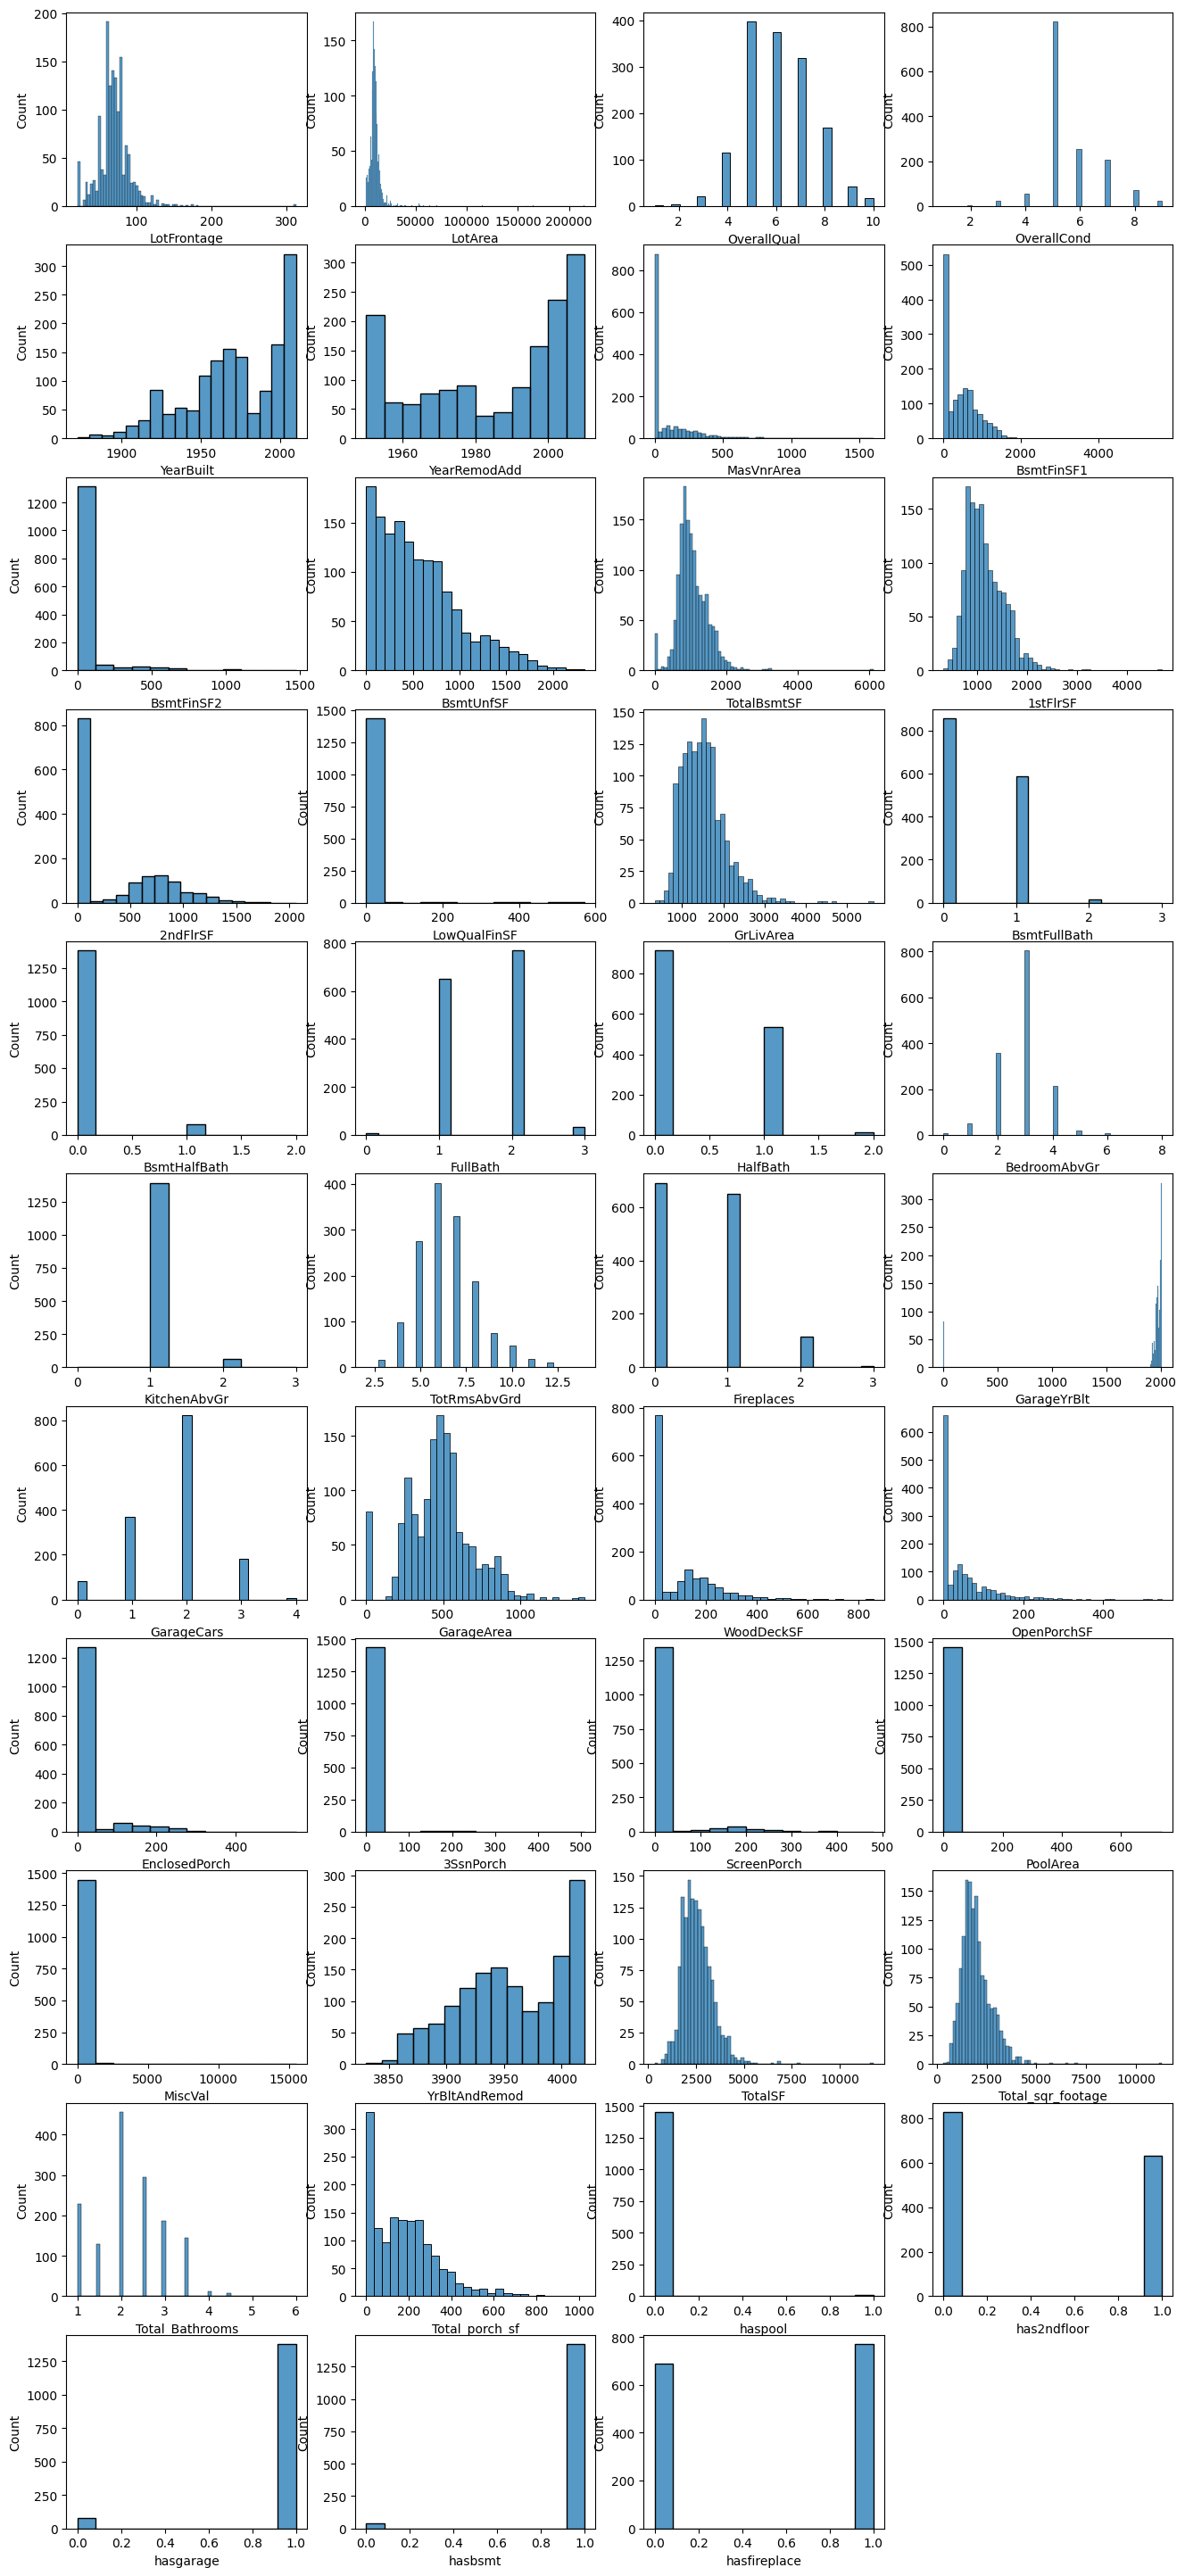

In [17]:
plt.figure(figsize=(16,40))
for n, col in enumerate(quantitative,1):
    plt.subplot(12,4,n)
    sns.histplot(new_data[col])
plt.show()

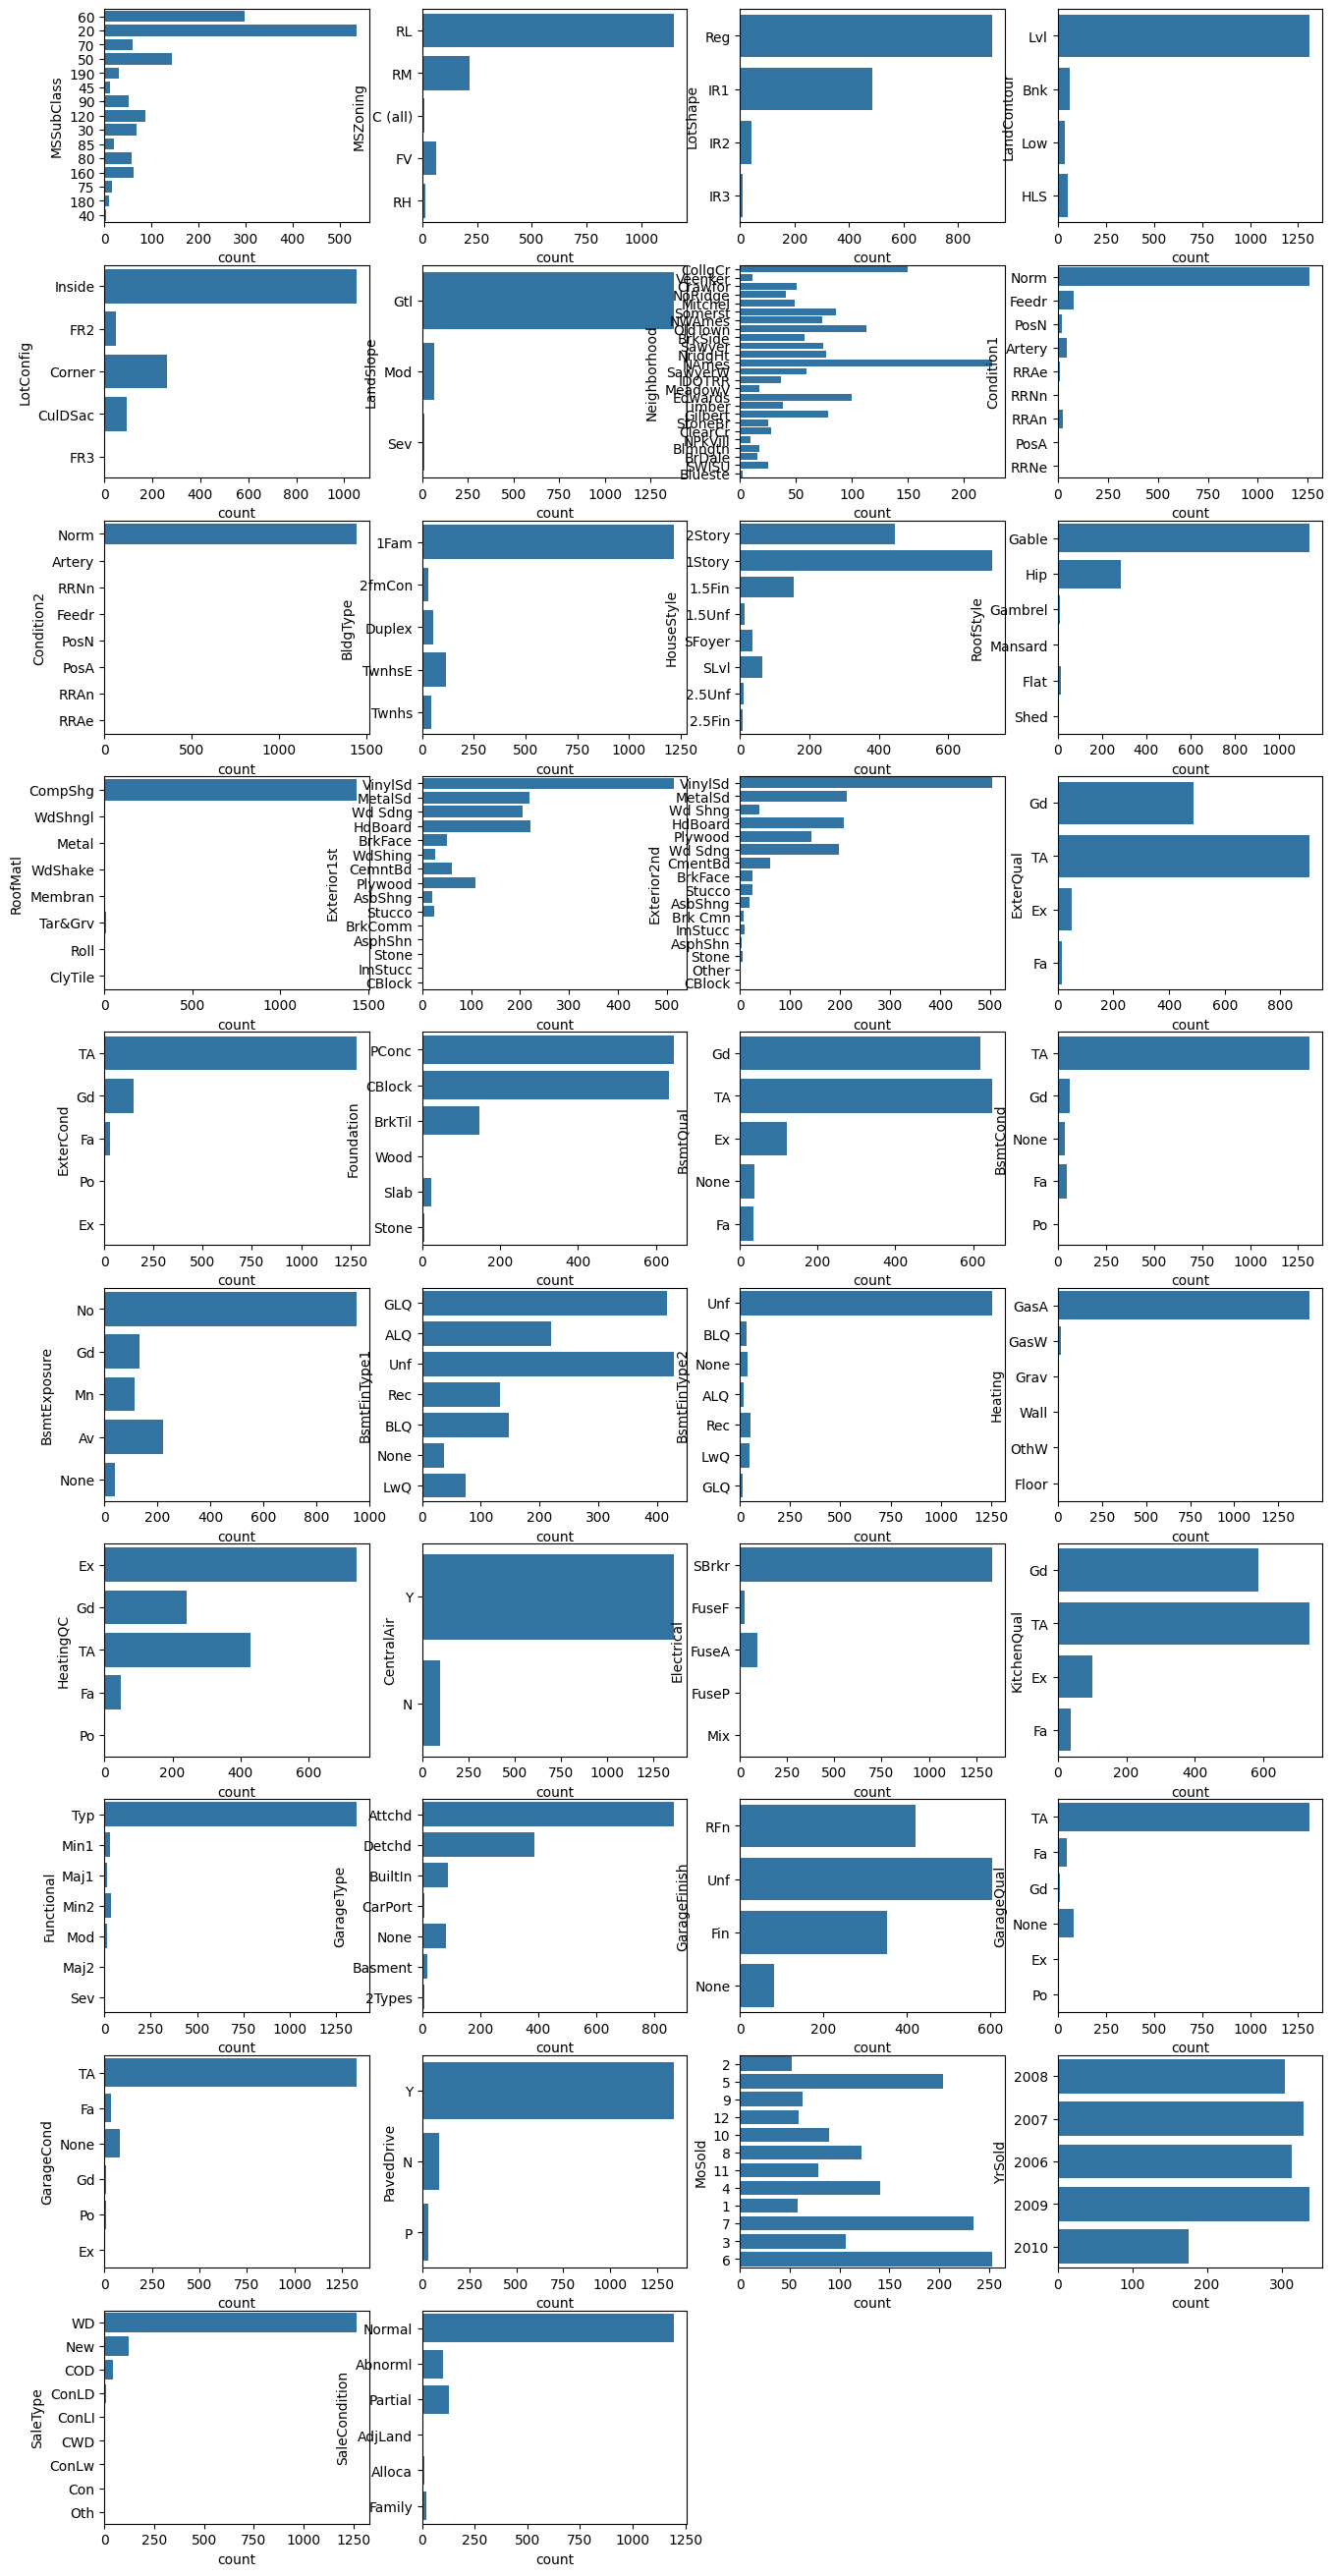

In [18]:
plt.figure(figsize=(16,40))
for n, col in enumerate(qualitative,1):
    plt.subplot(12,4,n)
    sns.countplot(y = col, data = new_data)
plt.show()

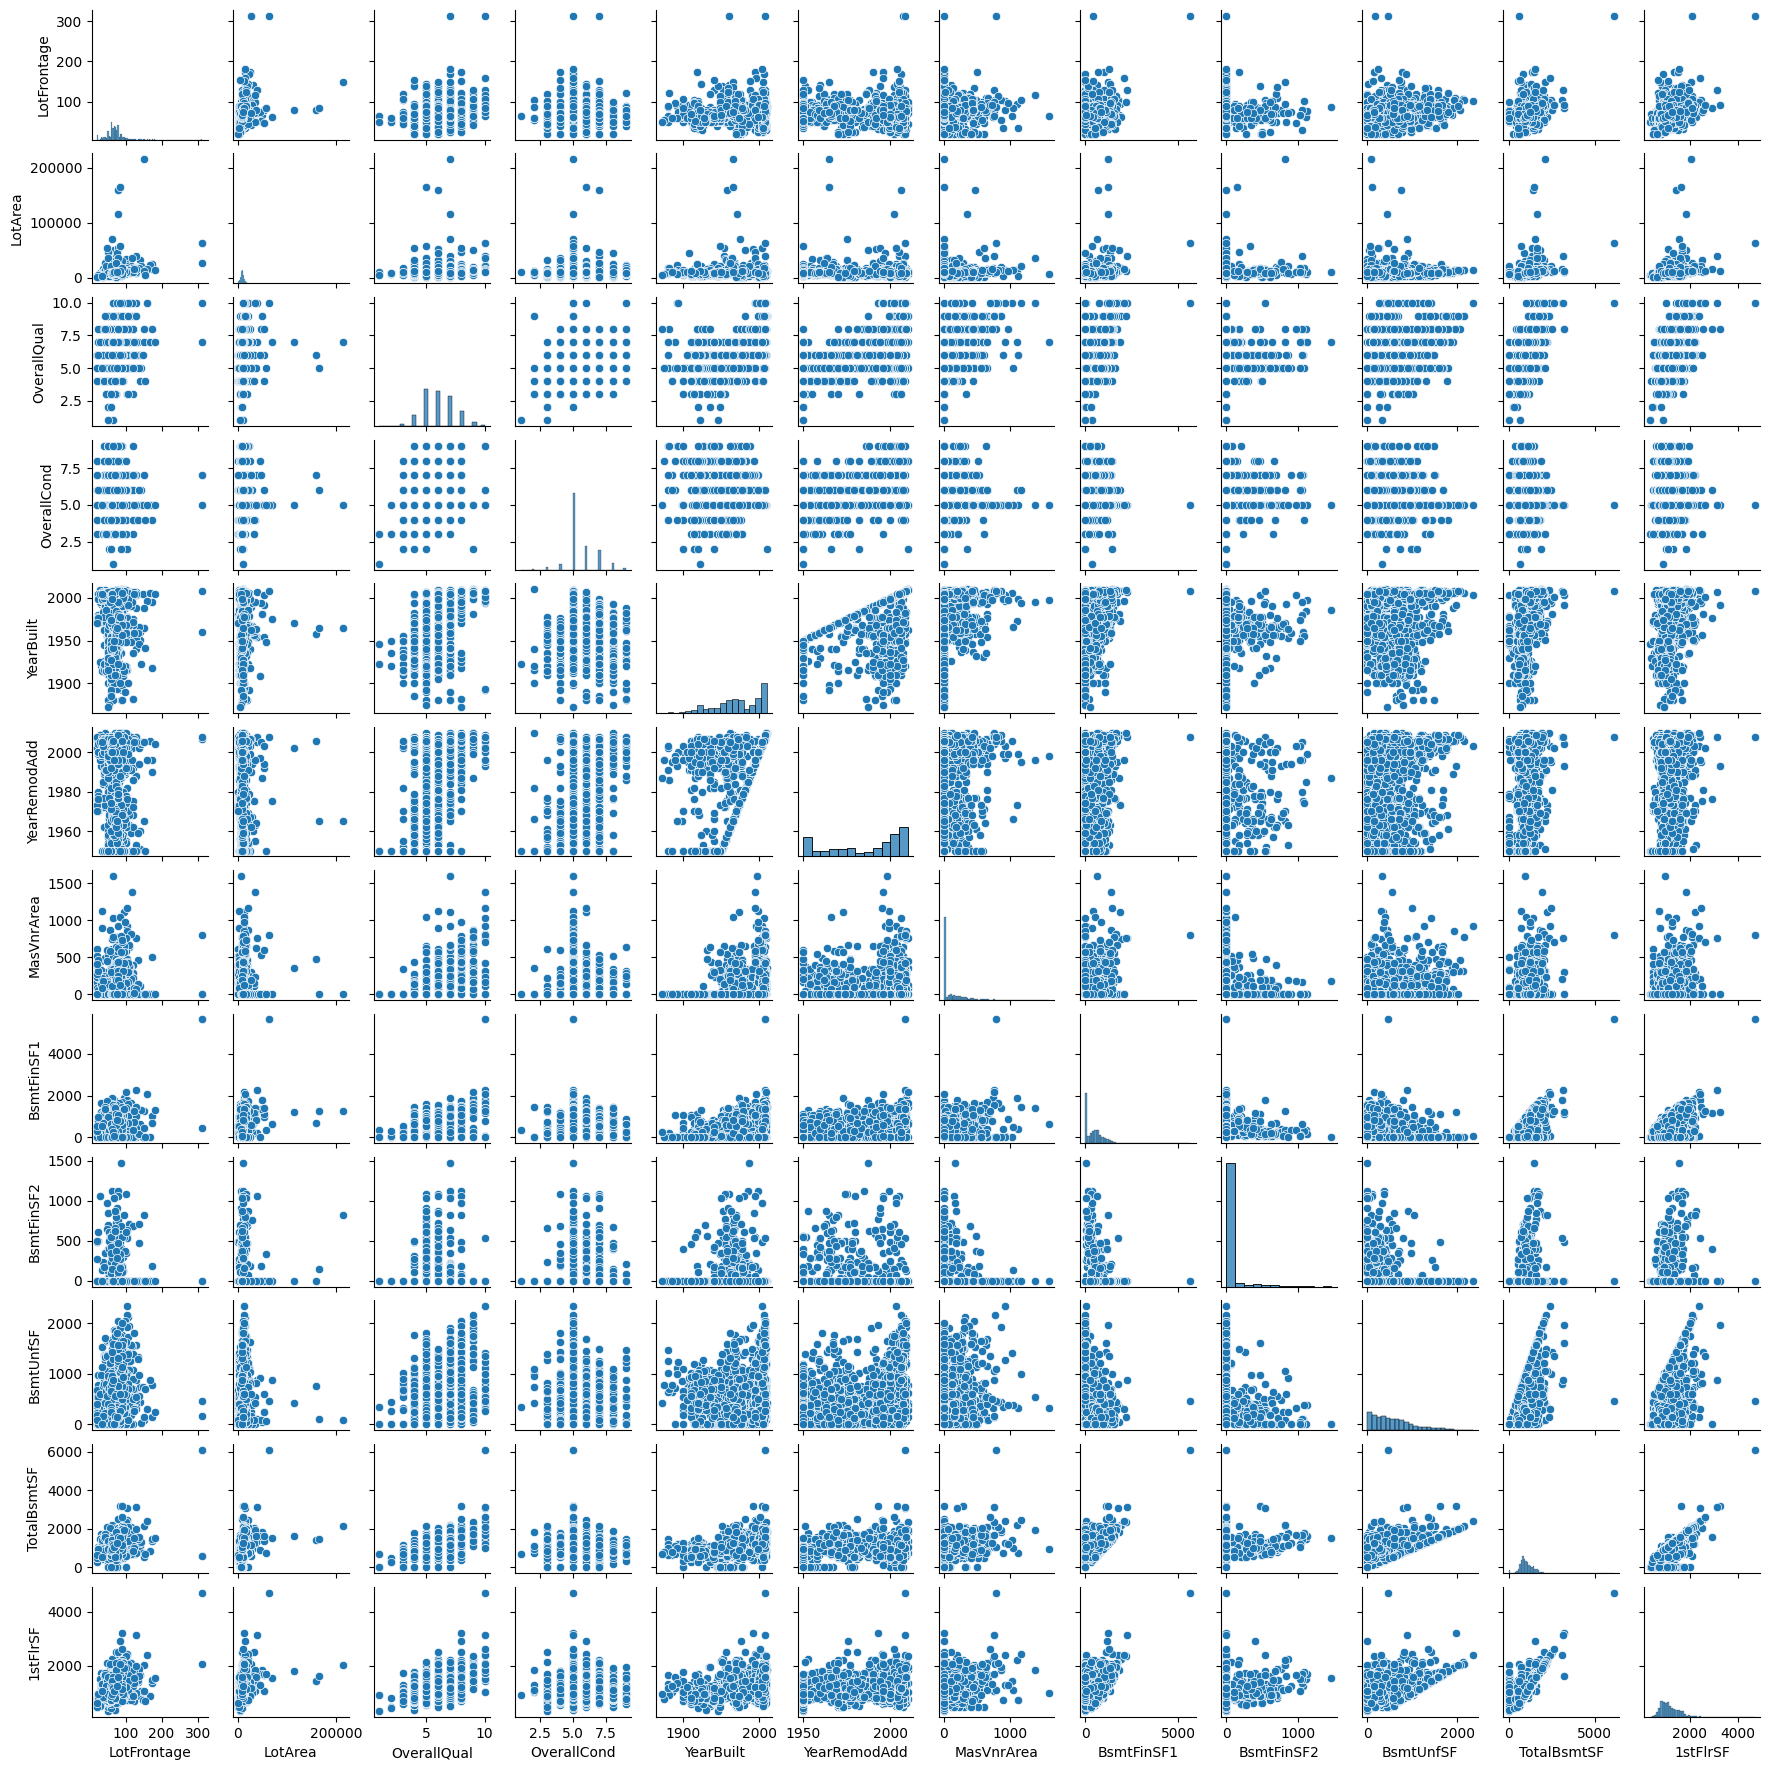

In [19]:
sns.pairplot(new_data[quantitative].iloc[:,0:12], height=1.5)

## Analisis-Univariable

### Plot Numeric Data

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64 



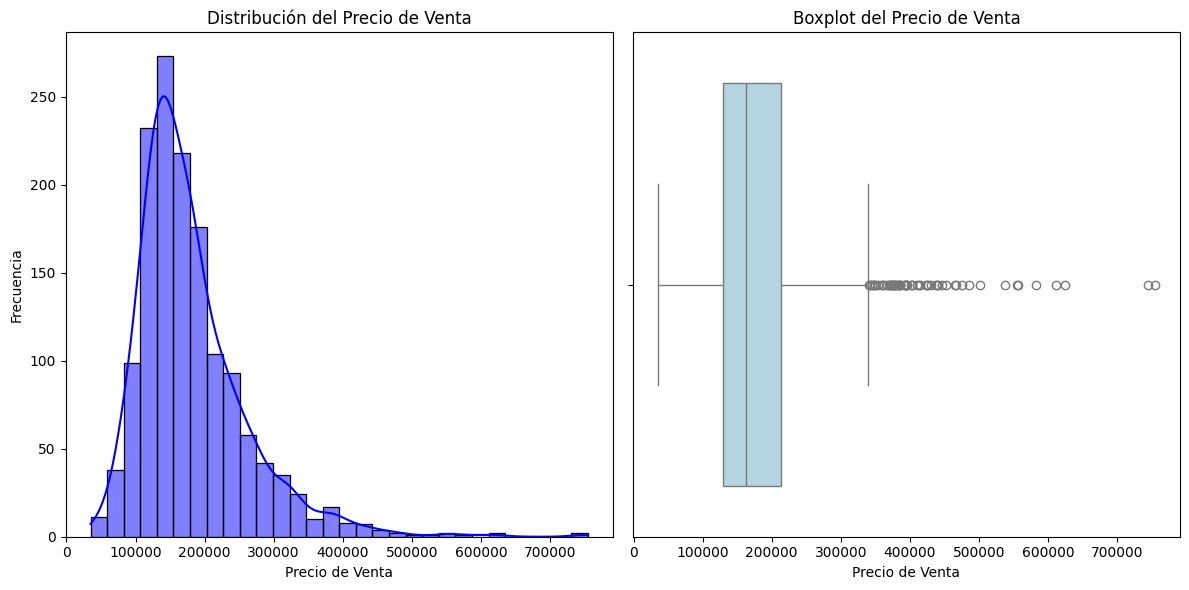

In [20]:
sale_price_description = new_data['SalePrice'].describe()
print(sale_price_description, "\n")

# Visualización de la distribución del precio de venta
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)

sns.histplot(new_data['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=new_data['SalePrice'], color='lightblue')
plt.title('Boxplot del Precio de Venta')
plt.xlabel('Precio de Venta')

plt.tight_layout()
plt.show()



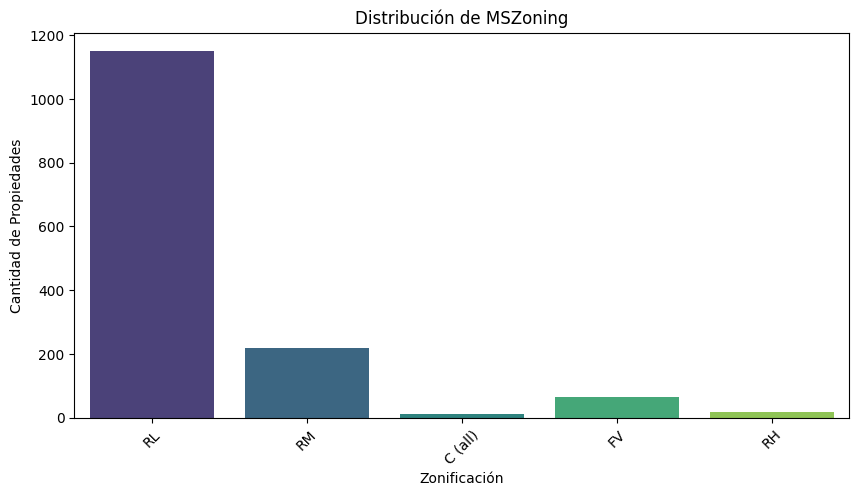

In [21]:
# Gráfico de barras para MSZoning
plt.figure(figsize=(10, 5))
sns.countplot(data=new_data, x='MSZoning', palette='viridis')
plt.title('Distribución de MSZoning')
plt.xlabel('Zonificación')
plt.ylabel('Cantidad de Propiedades')
plt.xticks(rotation=45)
plt.show()


* **Numéricas:** Los histogramas y boxplots permiten observar la distribución, tendencias y outliers de las variables.
* **Categóricas:** El gráfico de barras muestra la frecuencia de cada categoría, ayudando a identificar cuál es la más común.

# Análisis Bivariable

Relación entre Variables Numéricas

SalePrice vs OverallQual

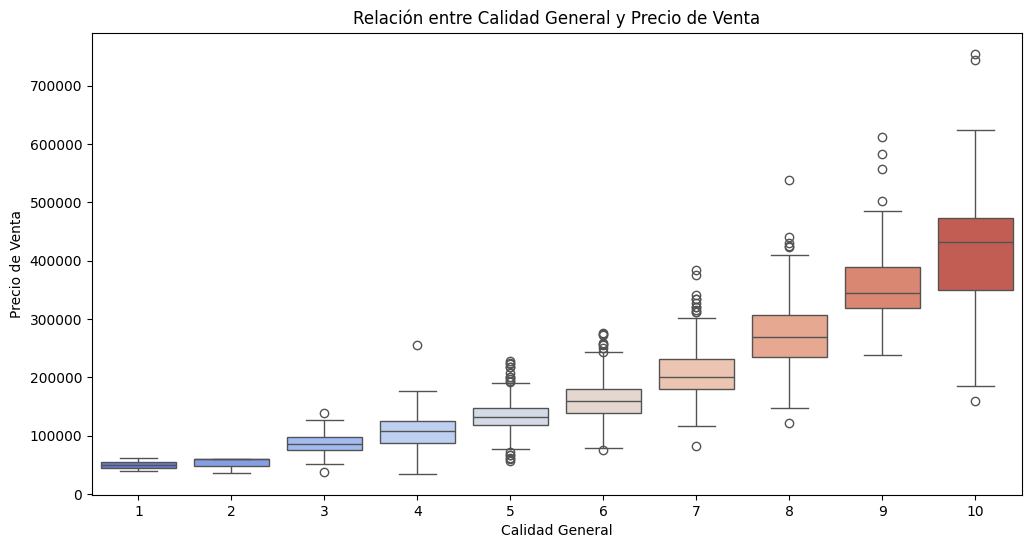

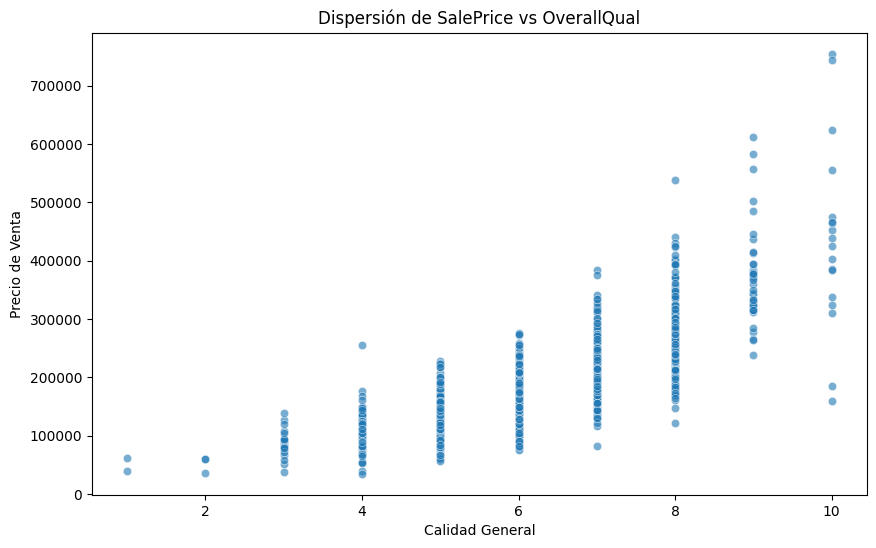

In [22]:
# Gráfico de cajas
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=new_data, palette='coolwarm')
plt.title('Relación entre Calidad General y Precio de Venta')
plt.xlabel('Calidad General')
plt.ylabel('Precio de Venta')
plt.xticks(rotation=0)
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=new_data, alpha=0.6)
plt.title('Dispersión de SalePrice vs OverallQual')
plt.xlabel('Calidad General')
plt.ylabel('Precio de Venta')
plt.show()


Relación entre Variables Categóricas

MSZoning vs SalePrice

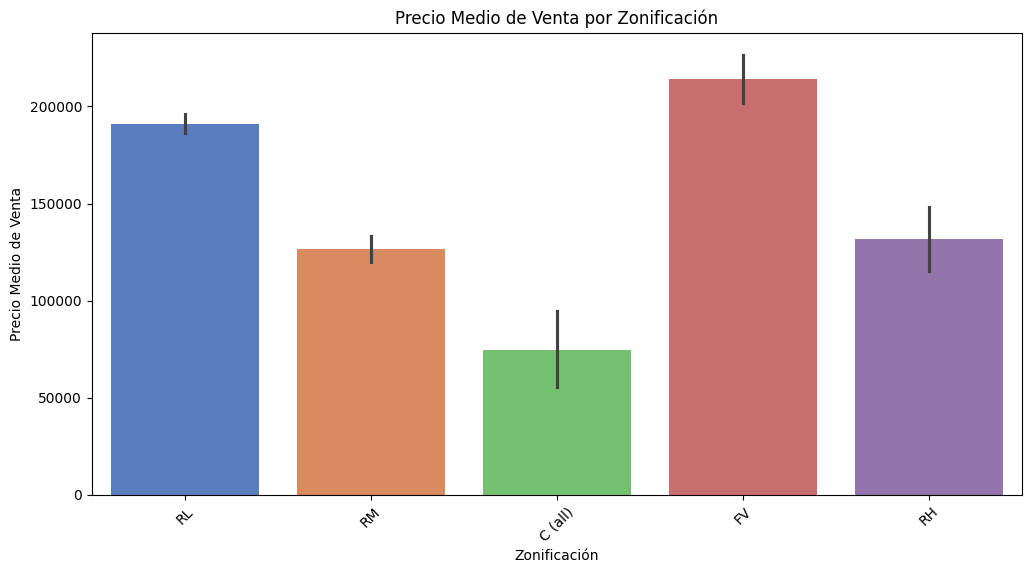

In [23]:
# Gráfico de barras para analizar la media del precio por zonificación
plt.figure(figsize=(12, 6))
sns.barplot(x='MSZoning', y='SalePrice', data=new_data, palette='muted')
plt.title('Precio Medio de Venta por Zonificación')
plt.xlabel('Zonificación')
plt.ylabel('Precio Medio de Venta')
plt.xticks(rotation=45)
plt.show()


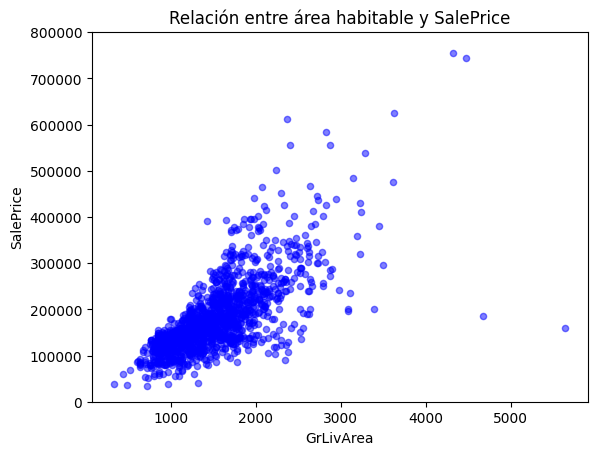

In [24]:
# Suponiendo que 'df' es tu DataFrame original
var = 'GrLivArea'
data = pd.concat([new_data['SalePrice'], new_data[var]], axis=1)

# Crear el gráfico de dispersión
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), color='blue', alpha=0.5)
plt.title(f'Relación entre área habitable y SalePrice')
plt.xlabel(var)
plt.ylabel('SalePrice')
#plt.grid(True)
plt.show()

# Análisis Multivariable

## Preparacion de Datos y Modelado


In [25]:
# Identify categorical features
categorical_features = data_final.select_dtypes(include=['object']).columns


In [26]:
# Create a OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with Ridge

# Fit and transform the encoder on categorical features
encoded_features = encoder.fit_transform(data_final.loc[:, categorical_features])

# Create a DataFrame from encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
numerical_features = data_final.drop(columns=categorical_features.union(['SalePrice'])) # Exclude target variable
X = pd.concat([numerical_features, encoded_df], axis=1)
y = data_final['SalePrice']

## Splitting data into Train Test

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
#Convert X_train and X_test back to dataframes so we can preserve column names later
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [28]:
# Definimos el modelo
model = LinearRegression()

# RFE para seleccionar las mejores características
rfe = RFE(model, n_features_to_select=10)  # Seleccionamos las 10 mejores características
fit = rfe.fit(X_train, y_train)

# Características seleccionadas
selected_features = X_train.columns[fit.support_]
print("Características seleccionadas por RFE:", selected_features)

Características seleccionadas por RFE: Index(['YearBuilt', 'YearRemodAdd', 'YrBltAndRemod', 'Condition2_PosA',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl'],
      dtype='object')


In [29]:


# Supongamos que 'X' son las variables independientes y 'y' es la variable dependiente
X = data_final.drop('SalePrice', axis=1)  # Asegúrate de ajustar el nombre de la columna
y = data_final['SalePrice']

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Obtener coeficientes
coefficients = model.coef_
features = X.columns

# Crear un DataFrame para mostrar coeficientes junto con los nombres de las variables
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Ordenar por el valor absoluto del coeficiente
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Mostrar las variables más significativas
print(coef_df[['Feature', 'Coefficient']].head(10))  # Ajusta el número según sea necesario


              Feature  Coefficient
129  RoofMatl_Membran    753821.53
130    RoofMatl_Metal    720973.19
134  RoofMatl_WdShngl    706617.56
132  RoofMatl_Tar&Grv    660039.39
128  RoofMatl_CompShg    655721.81
131     RoofMatl_Roll    651706.49
133  RoofMatl_WdShake    648867.36
108   Condition2_PosN   -235870.05
235     GarageQual_Po   -125720.60
109   Condition2_RRAe   -122566.34


In [30]:
# Calculamos el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Filtramos características con un VIF alto
high_vif = vif_data[vif_data["VIF"] > 10]
print("Características con alto VIF:", high_vif)

Características con alto VIF:                    feature    VIF
4                YearBuilt    inf
5             YearRemodAdd    inf
7               BsmtFinSF1    inf
8               BsmtFinSF2    inf
9                BsmtUnfSF    inf
..                     ...    ...
239        GarageCond_None    inf
240          GarageCond_Po  17.70
241          GarageCond_TA 268.33
264           SaleType_New 127.66
271  SaleCondition_Partial 126.19

[118 rows x 2 columns]


In [31]:
# Reset index of y_train to match X_train_sm
y_train_stats = y_train.reset_index(drop=True)

# Añadir una constante al modelo
X_train_stats = stats.add_constant(X_train)

# Ajustar el modelo OLS
ols_model = stats.OLS(y_train_stats, X_train_stats).fit()

# Resumen del modelo
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     52.45
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:53:30   Log-Likelihood:                -13207.
No. Observations:                1168   AIC:                         2.692e+04
Df Residuals:                     916   BIC:                         2.819e+04
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.031e+

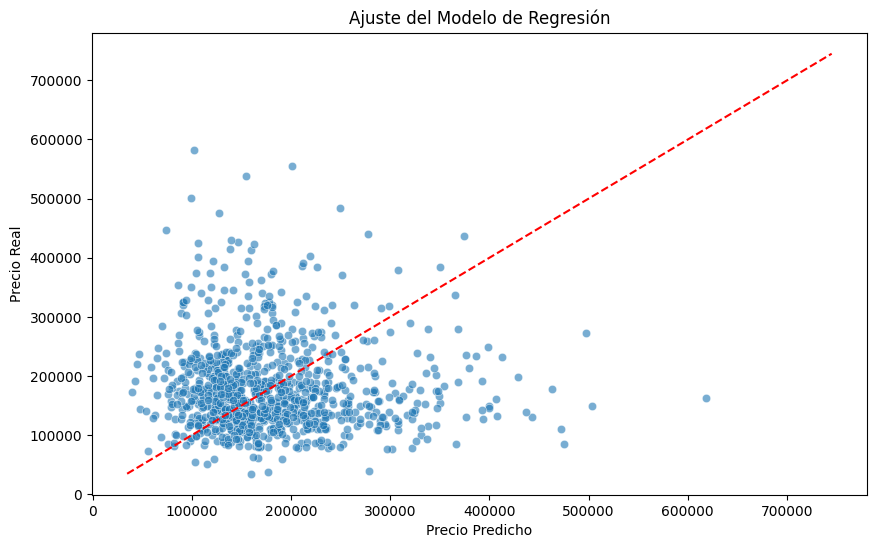

In [32]:
# Gráfico de dispersión para visualizar el ajuste
plt.figure(figsize=(10, 6))
# Assume X_train_stats is the intended variable, replace if needed
sns.scatterplot(x=ols_model.predict(X_train_stats), y=y_train, alpha=0.6)
plt.title('Ajuste del Modelo de Regresión')
plt.xlabel('Precio Predicho')
plt.ylabel('Precio Real')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Línea de referencia using y_train
plt.show()

# Construccion del Modelo


In [33]:
from sklearn.linear_model import RidgeCV

# Definimos el rango de valores de lambda
alphas = [0.1, 1.0, 10.0]

# Ajustar el modelo Ridge con validación cruzada
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train, y_train)

print("Optimal Lambda Value for Ridge:", ridge_model.alpha_)


Optimal Lambda Value for Ridge: 10.0


In [34]:
from sklearn.linear_model import LassoCV

# Ajustar el modelo Lasso con validación cruzada
lasso_model = LassoCV(alphas=alphas, cv=5)
lasso_model.fit(X_train, y_train)

print("Optimal Lambda Value for Lasso:", lasso_model.alpha_)


Optimal Lambda Value for Lasso: 10.0


In [35]:
from sklearn.linear_model import ElasticNetCV

# Ajustar el modelo ElasticNet con validación cruzada
elastic_net_model = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5)
elastic_net_model.fit(X_train, y_train)

print("Optimal Lambda Value for ElasticNet:", elastic_net_model.alpha_)


Optimal Lambda Value for ElasticNet: 0.1


## Ridge Regression


In [36]:
ridge = Ridge(alpha=ridge_model.alpha_)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)


## Lasso Regression

In [37]:
lasso = Lasso(alpha=lasso_model.alpha_)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)


## ElasticNet Regression

In [38]:
elastic_net = ElasticNet(alpha=elastic_net_model.alpha_, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)


In [39]:
# Resultados de Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression")
print(f"* Optimal Lambda Value: {ridge_model.alpha_}")
print(f"* R2 Score Train: {ridge.score(X_train, y_train):.4f}")
print(f"* R2 Test Score: {ridge_r2:.4f}")
print(f"* RMSE Test: {ridge_rmse:.4f}\n")

# Resultados de Lasso Regression
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression")
print(f"* Optimal Lambda Value: {lasso_model.alpha_}")
print(f"* R2 Score Train: {lasso.score(X_train, y_train):.4f}")
print(f"* R2 Test Score: {lasso_r2:.4f}")
print(f"* RMSE Test: {lasso_rmse:.4f}\n")

# Resultados de ElasticNet Regression
elastic_net_rmse = mean_squared_error(y_test, elastic_net_pred, squared=False)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

print("ElasticNet Regression")
print(f"* Optimal Lambda Value: {elastic_net_model.alpha_}")
print(f"* R2 Score Train: {elastic_net.score(X_train, y_train):.4f}")
print(f"* R2 Test Score: {elastic_net_r2:.4f}")
print(f"* RMSE Test: {elastic_net_rmse:.4f}\n")


Ridge Regression
* Optimal Lambda Value: 10.0
* R2 Score Train: 0.8941
* R2 Test Score: 0.8778
* RMSE Test: 30616.1488

Lasso Regression
* Optimal Lambda Value: 10.0
* R2 Score Train: 0.9306
* R2 Test Score: 0.7845
* RMSE Test: 40655.8097

ElasticNet Regression
* Optimal Lambda Value: 0.1
* R2 Score Train: 0.8686
* R2 Test Score: 0.8673
* RMSE Test: 31907.7243



# Conclusions y Observaciones

#### **Ridge Regression**
- **Optimal Lambda Value:** 10.0
- **R2 Score Train:** 0.8941
- **R2 Test Score:** 0.8778
- **RMSE Test:** 30616.1488

**Interpretación:**
El modelo de Ridge muestra un buen ajuste tanto en el conjunto de entrenamiento como en el de prueba, con un R² relativamente alto que indica que el modelo puede explicar una buena parte de la variabilidad del precio de venta. Sin embargo, el RMSE sugiere que, aunque el modelo tiene un buen rendimiento, hay un margen de error considerable en las predicciones.

#### **Lasso Regression**
- **Optimal Lambda Value:** 10.0
- **R2 Score Train:** 0.9306
- **R2 Test Score:** 0.7845
- **RMSE Test:** 40655.8097

**Interpretación:**
El modelo Lasso presenta un R² más alto en el conjunto de entrenamiento, lo que sugiere un buen ajuste, pero su desempeño en el conjunto de prueba es significativamente inferior. Esto podría indicar sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. El RMSE también es más alto en comparación con Ridge, lo que refuerza esta conclusión.

#### **ElasticNet Regression**
- **Optimal Lambda Value:** 0.1
- **R2 Score Train:** 0.8686
- **R2 Test Score:** 0.8673
- **RMSE Test:** 31907.7243

**Interpretación:**
El modelo de ElasticNet muestra un equilibrio entre el ajuste del conjunto de entrenamiento y el de prueba, con un R² que indica un buen rendimiento general en ambas partes. El RMSE es intermedio entre Ridge y Lasso, sugiriendo que tiene un buen rendimiento, aunque todavía hay espacio para mejorar.

### Conclusiones Generales
1. **Ridge Regression** parece ser la opción más robusta en términos de desempeño en el conjunto de prueba, aunque con un RMSE significativo.
2. **Lasso Regression** tiende a sobreajustar, lo que se evidencia por el alto R² en entrenamiento y bajo en prueba.
3. **ElasticNet** ofrece un balance, manteniendo un rendimiento sólido en ambos conjuntos, lo que lo hace una opción viable, especialmente cuando se buscan características relevantes y se evita la multicolinealidad.
